In [1]:
import sys 
sys.path.append('../') 
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  

from utils.vis import plot_masked_image_3x3, get_masked_image_from_json 

### v4

* weighted-soft ensemble사용. thr=0.6 
* institution = [SIIM, MIMIC, NIH, VBD, CXD]  
* 총 7908개의 positive 데이터 추가 
* ensemble model 
    * exp12: effiU-b5_aux-copypaste-noise1 
    * exp14: effiU-b5_aux-copypaste-noise1-v3 
    * exp16: effiU-b5_aux-copypaste-noise1-v1 

In [3]:
len(os.listdir('/ai-data/chest/kjs2109/pseudo_label_dataset/chestALL/annotations/1findings/v4'))

7908

In [4]:
v4_output_df = pd.read_csv('/ai-data/chest/kjs2109/pseudo_label_dataset/chestALL/outputs/1findings/v4/output-12-12-15-50-45.csv') 
len(v4_output_df) 
v4_output_df.head() 

image_id                       PredictionString
0  SIIM/SIIM_CXR_001628.jpg  0 0.9996932148933411 590 144 923 591 
1  SIIM/SIIM_CXR_004176.jpg                                    NaN
2  SIIM/SIIM_CXR_008111.jpg   0 0.728141725063324 234 166 433 285 
3  SIIM/SIIM_CXR_005091.jpg                                    NaN
4  SIIM/SIIM_CXR_009751.jpg                                    NaN

In [5]:
v4_siim_df = v4_output_df[v4_output_df['image_id'].str.contains('SIIM')] 
v4_mimic_df = v4_output_df[v4_output_df['image_id'].str.contains('MIMIC')] 
v4_nih_df = v4_output_df[v4_output_df['image_id'].str.contains('NIH')] 
v4_vbd_df = v4_output_df[v4_output_df['image_id'].str.contains('VBD')] 
v4_cxd_df = v4_output_df[v4_output_df['image_id'].str.contains('CXD')] 

print('SIIM:', len(v4_siim_df), len(v4_siim_df[v4_siim_df['PredictionString'].notna()]))
print('MIMIC:', len(v4_mimic_df), len(v4_mimic_df[v4_mimic_df['PredictionString'].notna()]))
print('NIH:', len(v4_nih_df), len(v4_nih_df[v4_nih_df['PredictionString'].notna()]))
print('VBD:', len(v4_vbd_df), len(v4_vbd_df[v4_vbd_df['PredictionString'].notna()]))
print('CXD:', len(v4_cxd_df), len(v4_cxd_df[v4_cxd_df['PredictionString'].notna()]))


SIIM: 10675 917
MIMIC: 381991 3717
NIH: 112120 3059
VBD: 15000 95
CXD: 3578 120


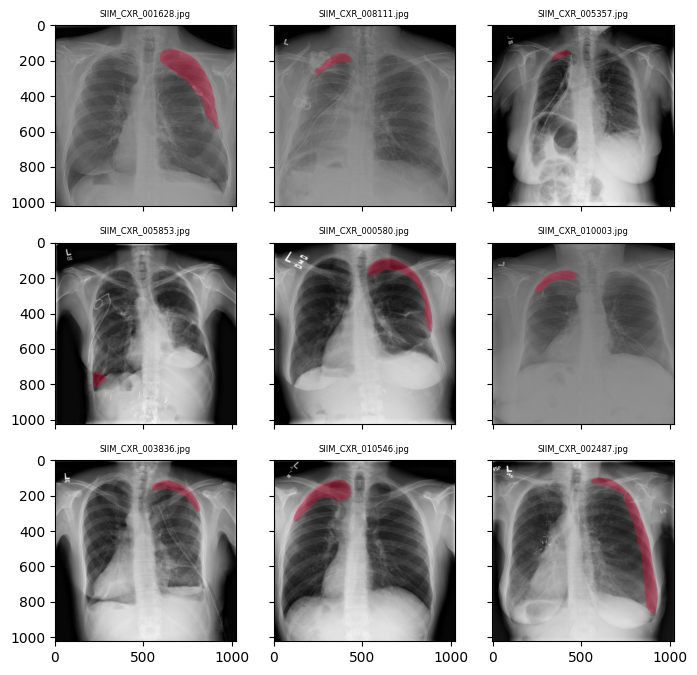

In [15]:
image_root_dir = '/ai-data/chest/kjs2109/pseudo_label_dataset/chestALL/images' 
label_root_dir = '/ai-data/chest/kjs2109/pseudo_label_dataset/chestALL/annotations/1findings/v4' 

v4_siim_disease_list = [fname.split('/')[-1] for fname in v4_siim_df['image_id'][v4_siim_df['PredictionString'].notna()].tolist()]

plot_masked_image_3x3(image_root_dir, label_root_dir, v4_siim_disease_list[:9]) 

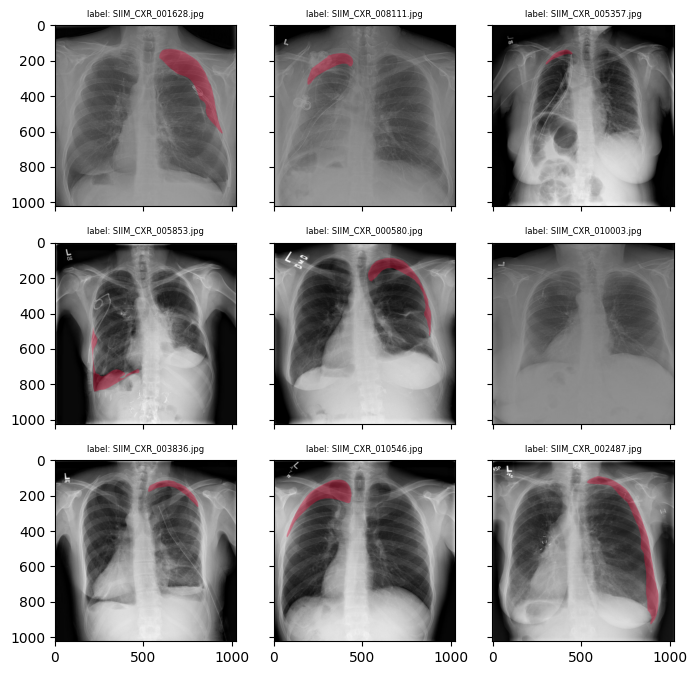

In [19]:
siim_image_dir = '/ai-data/chest/DATA/PublicDataset/SIIM/images'
siim_label_dir = '/ai-data/chest/DATA/PublicDataset/SIIM/anns' 

# siim_label_fnames = v4_siim_disease_list['new_image_fname'].tolist()[9:18]  

fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(8, 8)) 

for i, fname in enumerate(v4_siim_disease_list[:9]): 
    image_path = os.path.join(siim_image_dir, fname) 
    label_path = os.path.join(siim_label_dir, fname.replace('jpg', 'json')) 

    masked_image = get_masked_image_from_json(image_path, label_path)  
    axes[i//3, i%3].imshow(masked_image) 
    axes[i//3, i%3].set_title(f'label: {fname}', fontsize=6)

plt.show()  

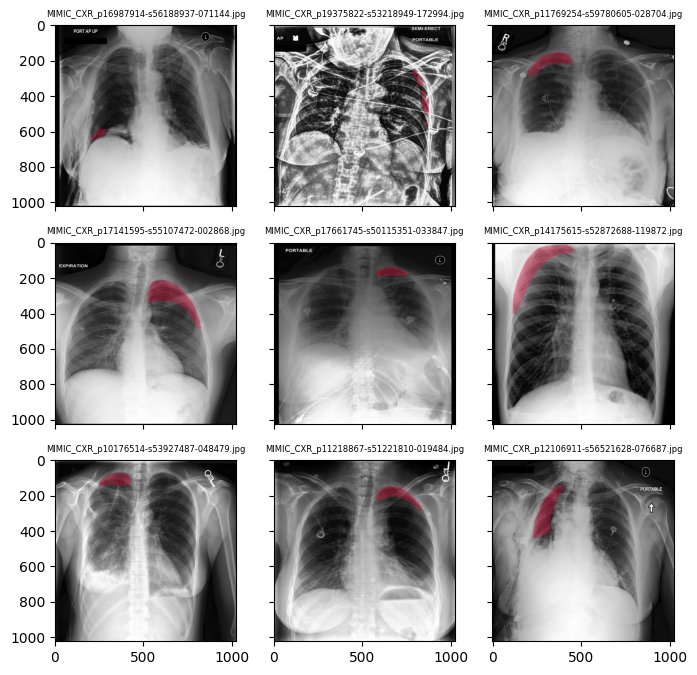

In [16]:
v4_mimic_disease_list = [fname.split('/')[-1] for fname in v4_mimic_df['image_id'][v4_mimic_df['PredictionString'].notna()].tolist()]
 
plot_masked_image_3x3(image_root_dir, label_root_dir, v4_mimic_disease_list[:9]) 

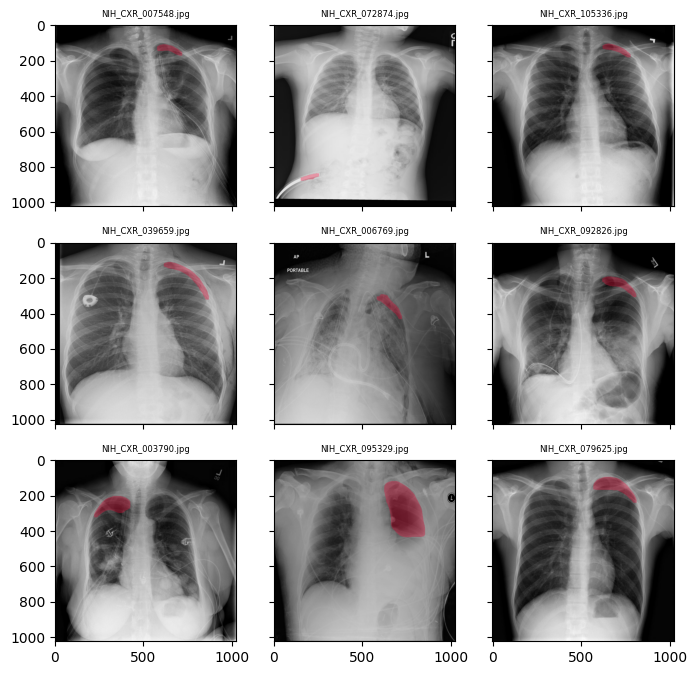

In [20]:
v4_nih_disease_list = [fname.split('/')[-1] for fname in v4_nih_df['image_id'][v4_nih_df['PredictionString'].notna()].tolist()]
 
plot_masked_image_3x3(image_root_dir, label_root_dir, v4_nih_disease_list[:9]) 

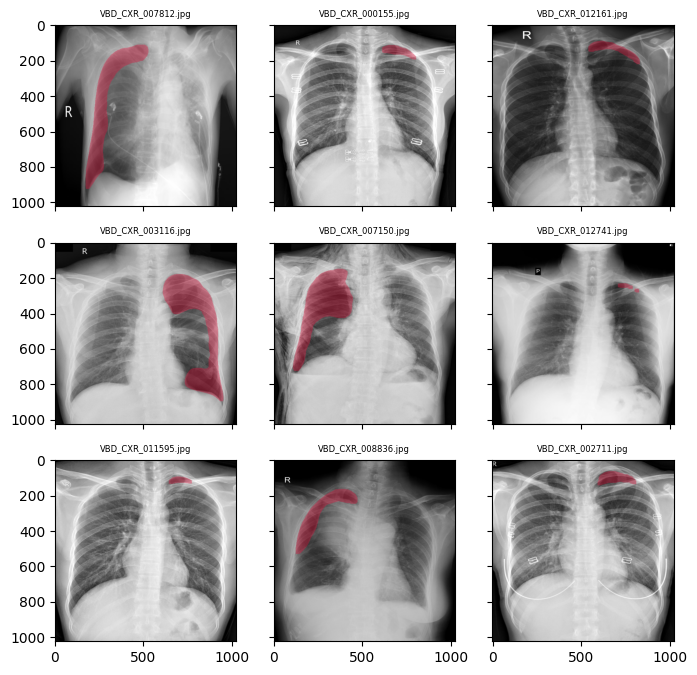

In [21]:
v4_vbd_disease_list = [fname.split('/')[-1] for fname in v4_vbd_df['image_id'][v4_vbd_df['PredictionString'].notna()].tolist()]
 
plot_masked_image_3x3(image_root_dir, label_root_dir, v4_vbd_disease_list[:9]) 

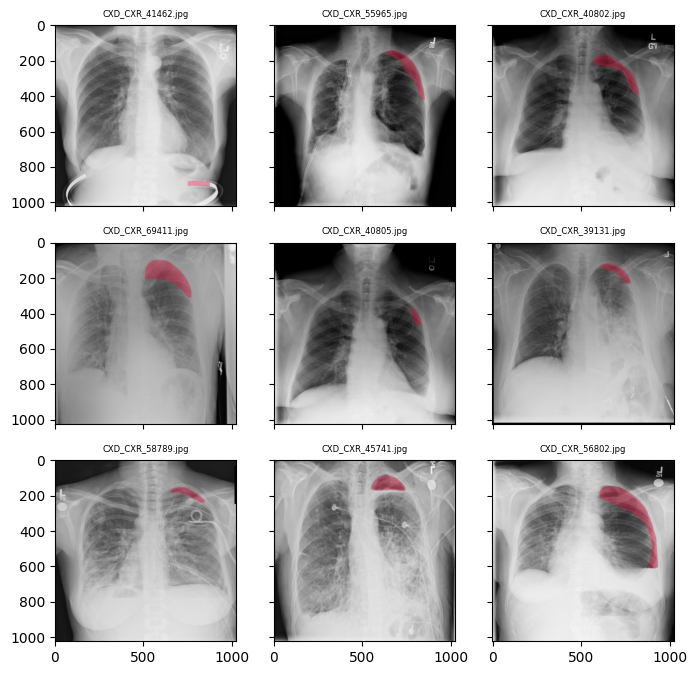

In [22]:
v4_cxd_disease_list = [fname.split('/')[-1] for fname in v4_cxd_df['image_id'][v4_cxd_df['PredictionString'].notna()].tolist()]
 
plot_masked_image_3x3(image_root_dir, label_root_dir, v4_cxd_disease_list[:9]) 

In [23]:
import numpy as np 

siim_label_df = pd.read_csv('/ai-data/chest/DATA/PublicDataset/SIIM/SIIM_labels.csv', index_col=2)  
print(siim_label_df.info()) 
siim_label_df.head()


correct = 0 
for i, row in enumerate(v4_siim_df.itertuples()): 
    image_fname = row.image_id.split('/')[-1] 
    if isinstance(row.PredictionString, float): 
        prob = 0 
    else: 
        predict_strings = row.PredictionString.strip().split(' ') 
        probs = map(float, predict_strings[1::5]) 
        prob = max(probs)  

    pred = round(prob) 

    gt = siim_label_df.loc[image_fname, 'pneumothorax'] 

    if pred == gt: 
        correct += 1 

print(correct / len(v4_siim_df)) 

<class 'pandas.core.frame.DataFrame'>
Index: 10675 entries, SIIM_CXR_000000.jpg to SIIM_CXR_010711.jpg
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          10675 non-null  int64 
 1   ori_image_fname     10675 non-null  object
 2   height              10675 non-null  int64 
 3   width               10675 non-null  int64 
 4   is_normal           10675 non-null  int64 
 5   pneumothorax        10675 non-null  int64 
 6   pneumothorax_count  10675 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 667.2+ KB
None
0.8340046838407494


In [24]:
siim_label_df['pneumothorax'].value_counts() 

0    8296
1    2379
Name: pneumothorax, dtype: int64

In [6]:
import numpy as np 

siim_label_df = pd.read_csv('/ai-data/chest/DATA/PublicDataset/SIIM/SIIM_labels.csv', index_col=2)  
print(siim_label_df.info()) 
siim_label_df.head()


correct = 0 
count_labeled_data = 0 
for i, row in enumerate(v4_siim_df.itertuples()): 
    image_fname = row.image_id.split('/')[-1] 
    if isinstance(row.PredictionString, float): 
        continue  
    else: 
        count_labeled_data += 1 
        if row.PredictionString == '-1': 
            prob = 0
        else: 
            predict_strings = row.PredictionString.strip().split(' ') 
            probs = map(float, predict_strings[1::5]) 
            prob = max(probs)  

    pred = round(prob) 

    gt = siim_label_df.loc[image_fname, 'pneumothorax'] 

    if pred == gt: 
        correct += 1 

print(correct / count_labeled_data)

<class 'pandas.core.frame.DataFrame'>
Index: 10675 entries, SIIM_CXR_000000.jpg to SIIM_CXR_010711.jpg
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          10675 non-null  int64 
 1   ori_image_fname     10675 non-null  object
 2   height              10675 non-null  int64 
 3   width               10675 non-null  int64 
 4   is_normal           10675 non-null  int64 
 5   pneumothorax        10675 non-null  int64 
 6   pneumothorax_count  10675 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 667.2+ KB
None
0.7829880043620502


### v5 

In [3]:
len(os.listdir('/ai-data/chest/kjs2109/pseudo_label_dataset/chestALL/annotations/1findings/v5'))

68666

In [4]:
v5_output_df = pd.read_csv('/ai-data/chest/kjs2109/pseudo_label_dataset/chestALL/outputs/1findings/v5/output-12-20-09-41-54.csv') 
len(v5_output_df) 
v5_output_df.head() 

image_id                       PredictionString
0  SIIM/SIIM_CXR_001628.jpg  0 0.9924910068511963 588 144 931 609 
1  SIIM/SIIM_CXR_004176.jpg                                    NaN
2  SIIM/SIIM_CXR_008111.jpg                                    NaN
3  SIIM/SIIM_CXR_005091.jpg                                    NaN
4  SIIM/SIIM_CXR_009751.jpg                                    NaN

In [5]:
v5_siim_df = v5_output_df[v5_output_df['image_id'].str.contains('SIIM')] 
v5_mimic_df = v5_output_df[v5_output_df['image_id'].str.contains('MIMIC')] 
v5_nih_df = v5_output_df[v5_output_df['image_id'].str.contains('NIH')] 
v5_vbd_df = v5_output_df[v5_output_df['image_id'].str.contains('VBD')] 
v5_cxd_df = v5_output_df[v5_output_df['image_id'].str.contains('CXD')] 
v5_etc_df = v5_output_df[v5_output_df['image_id'].str.contains('ETC')] 

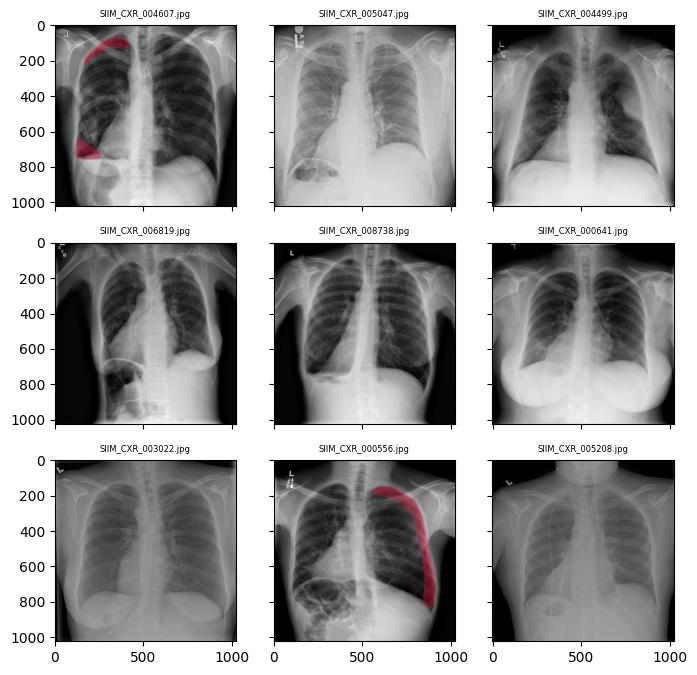

In [12]:
image_root_dir = '/ai-data/chest/kjs2109/pseudo_label_dataset/chestALL/images' 
label_root_dir = '/ai-data/chest/kjs2109/pseudo_label_dataset/chestALL/annotations/1findings/v5' 

v5_siim_disease_list = [fname.split('/')[-1] for fname in v5_siim_df['image_id'][v5_siim_df['PredictionString'].notna()].tolist()]

plot_masked_image_3x3(image_root_dir, label_root_dir, v5_siim_disease_list[45:54]) 

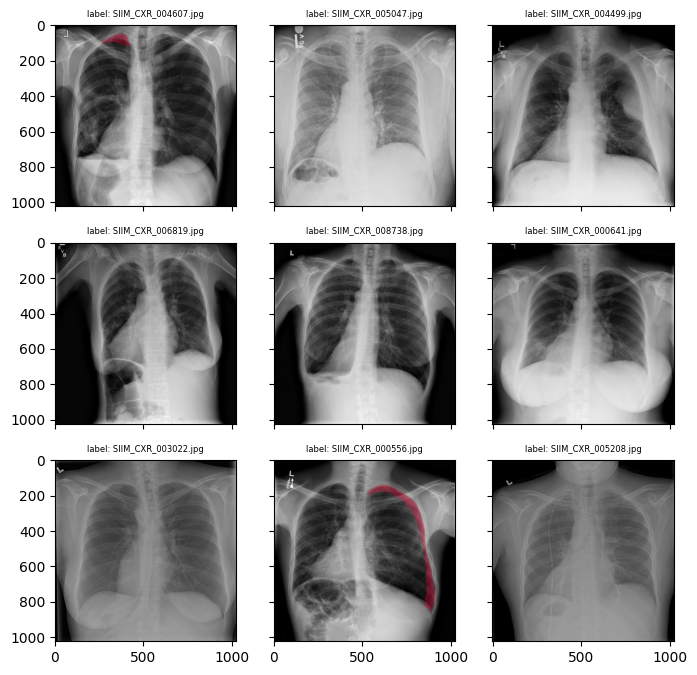

In [13]:
siim_image_dir = '/ai-data/chest/DATA/PublicDataset/SIIM/images'
siim_label_dir = '/ai-data/chest/DATA/PublicDataset/SIIM/anns' 

# siim_label_fnames = v4_siim_disease_list['new_image_fname'].tolist()[9:18]  

fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(8, 8)) 

for i, fname in enumerate(v5_siim_disease_list[45:54]): 
    image_path = os.path.join(siim_image_dir, fname) 
    label_path = os.path.join(siim_label_dir, fname.replace('jpg', 'json')) 

    masked_image = get_masked_image_from_json(image_path, label_path)  
    axes[i//3, i%3].imshow(masked_image) 
    axes[i//3, i%3].set_title(f'label: {fname}', fontsize=6)

plt.show()  

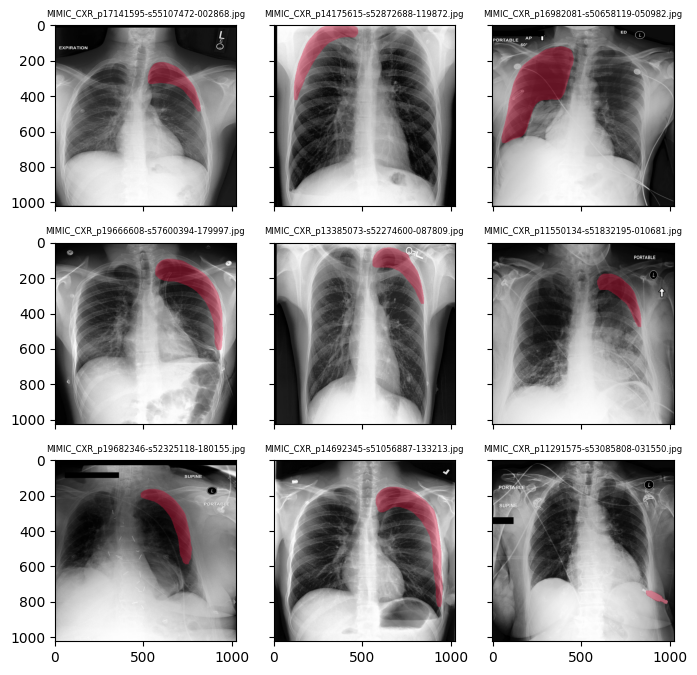

In [12]:
v5_mimic_disease_list = [fname.split('/')[-1] for fname in v5_mimic_df['image_id'][(v5_mimic_df['PredictionString'].notna()) & (v5_mimic_df['PredictionString'] != '-1')].tolist()]
 
plot_masked_image_3x3(image_root_dir, label_root_dir, v5_mimic_disease_list[:9]) 

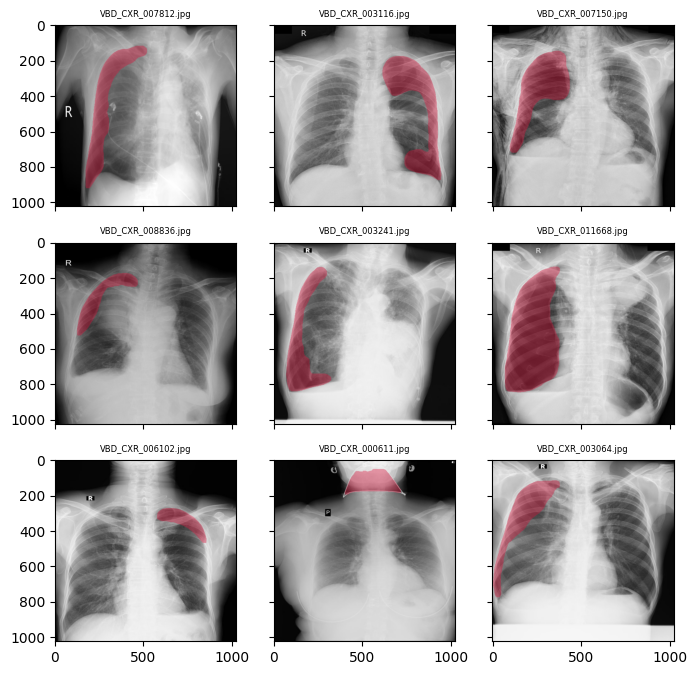

In [13]:
v5_vbd_disease_list = [fname.split('/')[-1] for fname in v5_vbd_df['image_id'][(v5_vbd_df['PredictionString'].notna()) & (v5_vbd_df['PredictionString'] != '-1')].tolist()] 

plot_masked_image_3x3(image_root_dir, label_root_dir, v5_vbd_disease_list[:9]) 

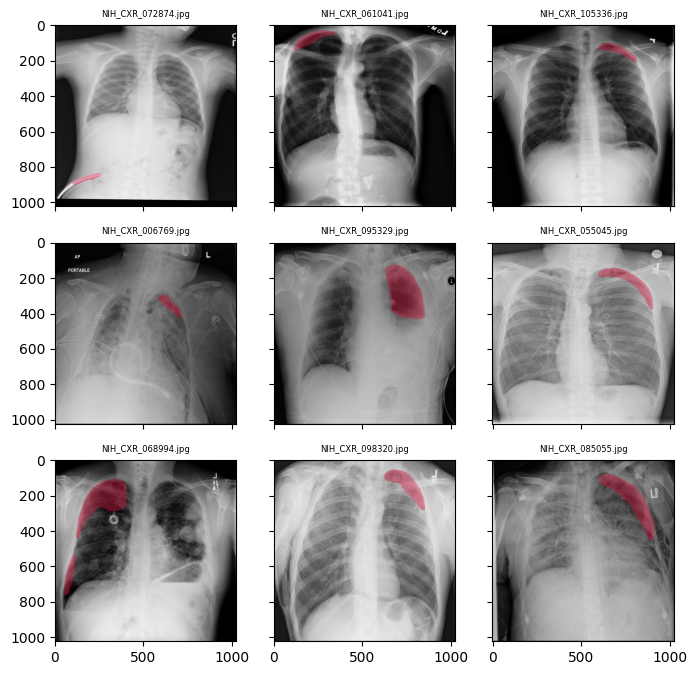

In [14]:
v5_nih_disease_list = [fname.split('/')[-1] for fname in v5_nih_df['image_id'][(v5_nih_df['PredictionString'].notna()) & (v5_nih_df['PredictionString'] != '-1')].tolist()] 

plot_masked_image_3x3(image_root_dir, label_root_dir, v5_nih_disease_list[:9]) 

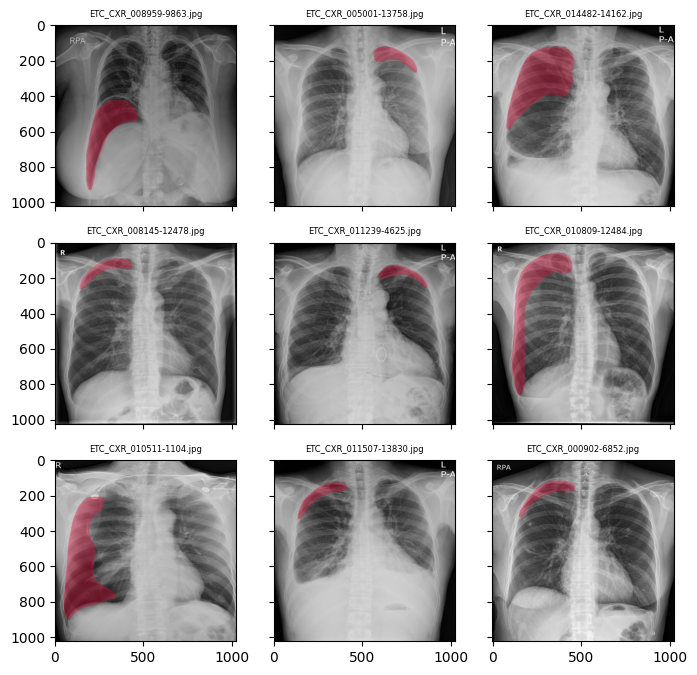

In [15]:
v5_etc_disease_list = [fname.split('/')[-1] for fname in v5_etc_df['image_id'][(v5_etc_df['PredictionString'].notna()) & (v5_etc_df['PredictionString'] != '-1')].tolist()] 

plot_masked_image_3x3(image_root_dir, label_root_dir, v5_etc_disease_list[:9]) 

In [10]:
import numpy as np 

siim_label_df = pd.read_csv('/ai-data/chest/DATA/PublicDataset/SIIM/SIIM_labels.csv', index_col=2)  
print(siim_label_df.info()) 
siim_label_df.head()


correct = 0 
count_labeled_data = 0 
for i, row in enumerate(v5_siim_df.itertuples()): 
    image_fname = row.image_id.split('/')[-1] 
    if isinstance(row.PredictionString, float): 
        continue  
    else: 
        count_labeled_data += 1 
        if row.PredictionString == '-1': 
            prob = 0
        else: 
            predict_strings = row.PredictionString.strip().split(' ') 
            probs = map(float, predict_strings[1::5]) 
            prob = max(probs)  

    pred = round(prob) 

    gt = siim_label_df.loc[image_fname, 'pneumothorax'] 

    if pred == gt: 
        correct += 1 

print(correct / count_labeled_data)

<class 'pandas.core.frame.DataFrame'>
Index: 10675 entries, SIIM_CXR_000000.jpg to SIIM_CXR_010711.jpg
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          10675 non-null  int64 
 1   ori_image_fname     10675 non-null  object
 2   height              10675 non-null  int64 
 3   width               10675 non-null  int64 
 4   is_normal           10675 non-null  int64 
 5   pneumothorax        10675 non-null  int64 
 6   pneumothorax_count  10675 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 667.2+ KB
None
0.9284051222351571


In [11]:
correct = 0 
count_labeled_data = 0 
for i, row in enumerate(v5_siim_df.itertuples()): 
    image_fname = row.image_id.split('/')[-1] 
    if isinstance(row.PredictionString, float): 
        continue  
    else: 
        if row.PredictionString == '-1': 
            continue 
        else: 
            count_labeled_data += 1 
            predict_strings = row.PredictionString.strip().split(' ') 
            probs = map(float, predict_strings[1::5]) 
            prob = max(probs)  

    pred = round(prob) 

    gt = siim_label_df.loc[image_fname, 'pneumothorax'] 

    if pred == gt: 
        correct += 1 

print(correct / count_labeled_data)

0.7890173410404624


### v6

In [2]:
len(os.listdir('/ai-data/chest/kjs2109/pseudo_label_dataset/chestALL/annotations/1findings/_v6'))

272317

In [3]:
v6_output_df = pd.read_csv('/ai-data/chest/kjs2109/pseudo_label_dataset/chestALL/outputs/1findings/_v6/output-01-09-07-43-34.csv') 
len(v6_output_df) 
v6_output_df.head() 

image_id                       PredictionString
0  SIIM/SIIM_CXR_001628.jpg  0 0.9978853464126587 590 142 907 501 
1  SIIM/SIIM_CXR_004176.jpg                                    NaN
2  SIIM/SIIM_CXR_008111.jpg                                    NaN
3  SIIM/SIIM_CXR_005091.jpg                                     -1
4  SIIM/SIIM_CXR_009751.jpg                                    NaN

In [4]:
v6_siim_df = v6_output_df[v6_output_df['image_id'].str.contains('SIIM')] 
v6_mimic_df = v6_output_df[v6_output_df['image_id'].str.contains('MIMIC')] 
v6_nih_df = v6_output_df[v6_output_df['image_id'].str.contains('NIH')] 
v6_vbd_df = v6_output_df[v6_output_df['image_id'].str.contains('VBD')] 
v6_cxd_df = v6_output_df[v6_output_df['image_id'].str.contains('CXD')] 
v6_etc_df = v6_output_df[v6_output_df['image_id'].str.contains('ETC')] 

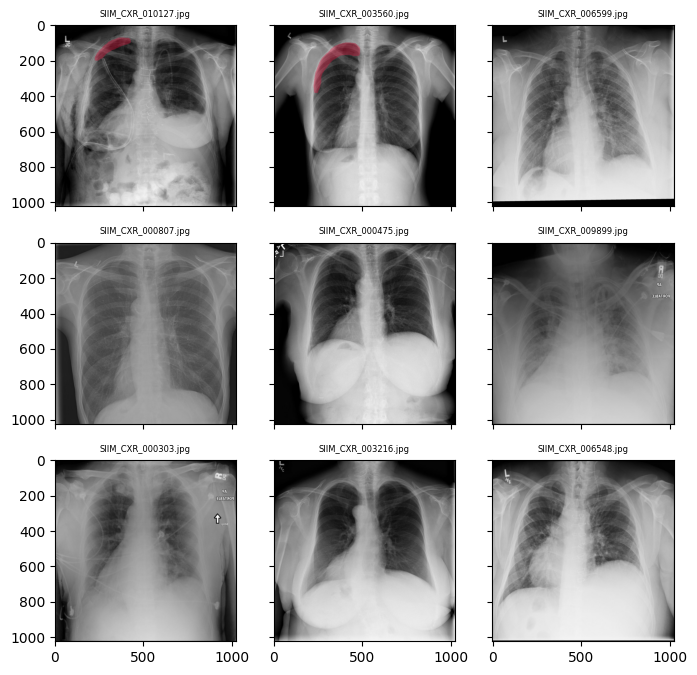

In [5]:
image_root_dir = '/ai-data/chest/kjs2109/pseudo_label_dataset/chestALL/images' 
label_root_dir = '/ai-data/chest/kjs2109/pseudo_label_dataset/chestALL/annotations/1findings/v6' 

v6_siim_disease_list = [fname.split('/')[-1] for fname in v6_siim_df['image_id'][v6_siim_df['PredictionString'].notna()].tolist()]

plot_masked_image_3x3(image_root_dir, label_root_dir, v6_siim_disease_list[45:54]) 

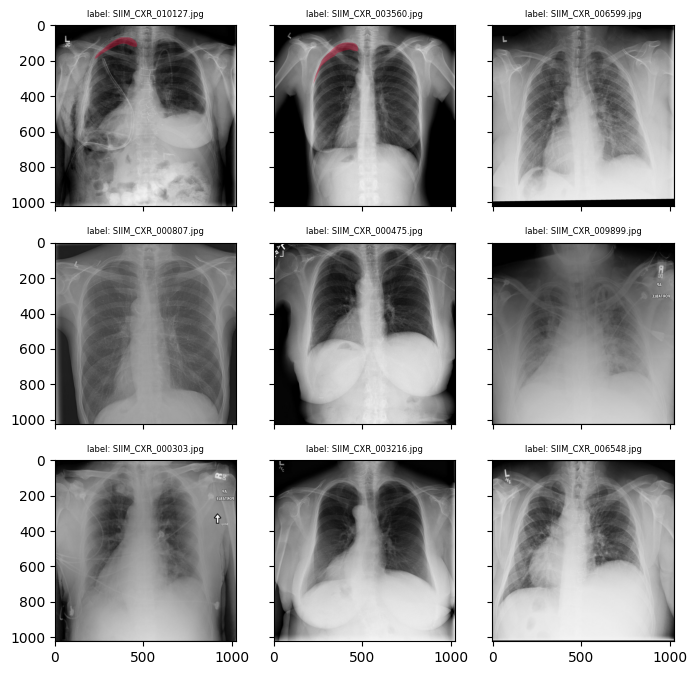

In [6]:
siim_image_dir = '/ai-data/chest/DATA/PublicDataset/SIIM/images'
siim_label_dir = '/ai-data/chest/DATA/PublicDataset/SIIM/anns' 

# siim_label_fnames = v4_siim_disease_list['new_image_fname'].tolist()[9:18]  

fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(8, 8)) 

for i, fname in enumerate(v6_siim_disease_list[45:54]): 
    image_path = os.path.join(siim_image_dir, fname) 
    label_path = os.path.join(siim_label_dir, fname.replace('jpg', 'json')) 

    masked_image = get_masked_image_from_json(image_path, label_path)  
    axes[i//3, i%3].imshow(masked_image) 
    axes[i//3, i%3].set_title(f'label: {fname}', fontsize=6)

plt.show()  

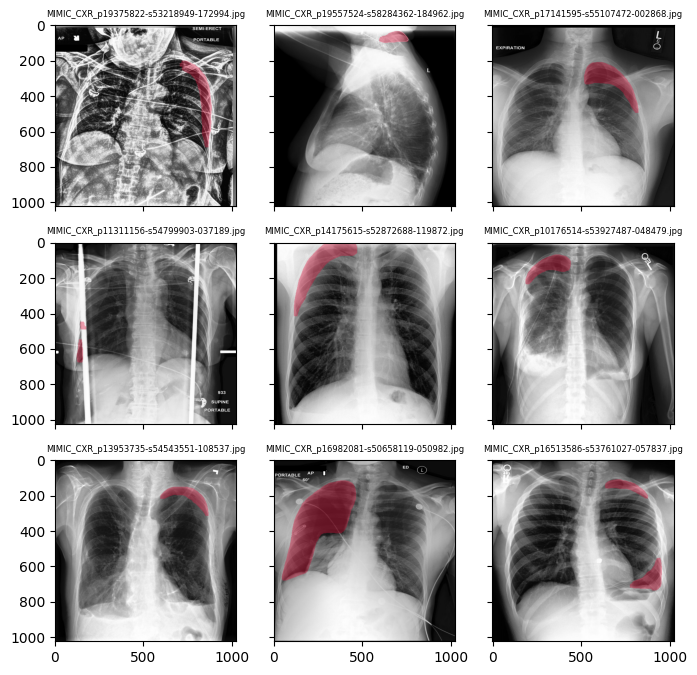

In [7]:
v6_mimic_disease_list = [fname.split('/')[-1] for fname in v6_mimic_df['image_id'][(v6_mimic_df['PredictionString'].notna()) & (v6_mimic_df['PredictionString'] != '-1')].tolist()]
 
plot_masked_image_3x3(image_root_dir, label_root_dir, v6_mimic_disease_list[:9])

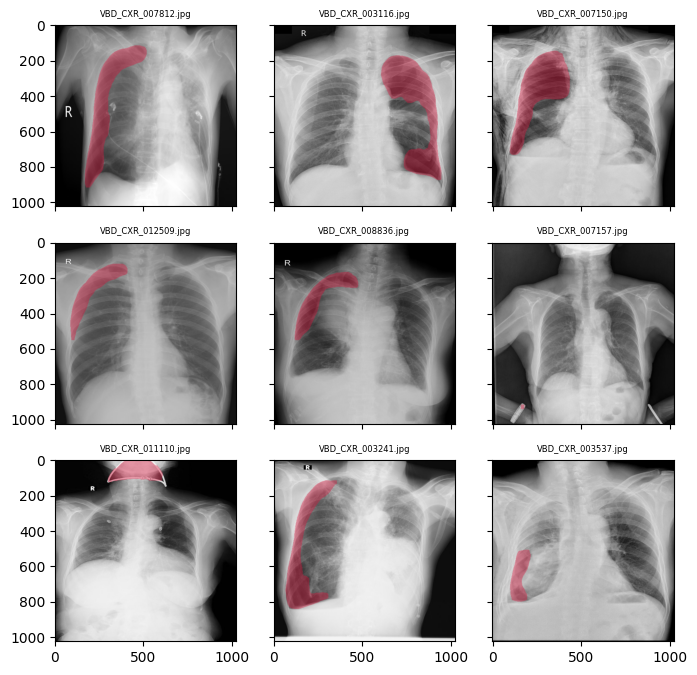

In [8]:
v6_vbd_disease_list = [fname.split('/')[-1] for fname in v6_vbd_df['image_id'][(v6_vbd_df['PredictionString'].notna()) & (v6_vbd_df['PredictionString'] != '-1')].tolist()] 

plot_masked_image_3x3(image_root_dir, label_root_dir, v6_vbd_disease_list[:9]) 

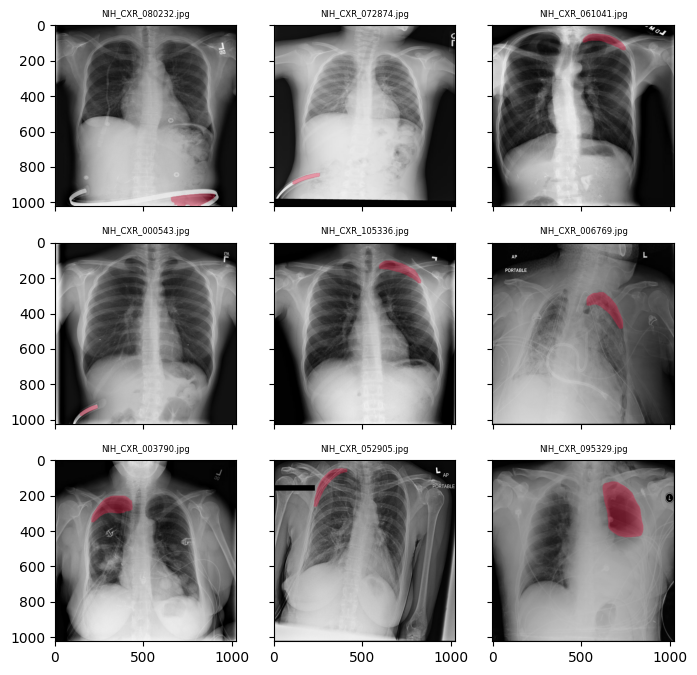

In [9]:
v6_nih_disease_list = [fname.split('/')[-1] for fname in v6_nih_df['image_id'][(v6_nih_df['PredictionString'].notna()) & (v6_nih_df['PredictionString'] != '-1')].tolist()] 

plot_masked_image_3x3(image_root_dir, label_root_dir, v6_nih_disease_list[:9]) 

In [10]:
import numpy as np 

siim_label_df = pd.read_csv('/ai-data/chest/DATA/PublicDataset/SIIM/SIIM_labels.csv', index_col=2)  
print(siim_label_df.info()) 
siim_label_df.head()


correct = 0 
count_labeled_data = 0 
for i, row in enumerate(v6_siim_df.itertuples()): 
    image_fname = row.image_id.split('/')[-1] 
    if isinstance(row.PredictionString, float): 
        continue  
    else: 
        count_labeled_data += 1 
        if row.PredictionString == '-1': 
            prob = 0
        else: 
            predict_strings = row.PredictionString.strip().split(' ') 
            probs = map(float, predict_strings[1::5]) 
            prob = max(probs)  

    pred = round(prob) 

    gt = siim_label_df.loc[image_fname, 'pneumothorax'] 

    if pred == gt: 
        correct += 1 

print(correct / count_labeled_data)

<class 'pandas.core.frame.DataFrame'>
Index: 10675 entries, SIIM_CXR_000000.jpg to SIIM_CXR_010711.jpg
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          10675 non-null  int64 
 1   ori_image_fname     10675 non-null  object
 2   height              10675 non-null  int64 
 3   width               10675 non-null  int64 
 4   is_normal           10675 non-null  int64 
 5   pneumothorax        10675 non-null  int64 
 6   pneumothorax_count  10675 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 667.2+ KB
None
0.9199060230670654


In [11]:
correct = 0 
count_labeled_data = 0 
for i, row in enumerate(v6_siim_df.itertuples()): 
    image_fname = row.image_id.split('/')[-1] 
    if isinstance(row.PredictionString, float): 
        continue  
    else: 
        if row.PredictionString == '-1': 
            continue 
        else: 
            count_labeled_data += 1 
            predict_strings = row.PredictionString.strip().split(' ') 
            probs = map(float, predict_strings[1::5]) 
            prob = max(probs)  

    pred = round(prob) 

    gt = siim_label_df.loc[image_fname, 'pneumothorax'] 

    if pred == gt: 
        correct += 1 

print(correct / count_labeled_data)

0.7366628830874007
